In [1]:
from cdFBA.processes.dfba import *
import pprint

from process_bigraph.composite import ProcessTypes
from process_bigraph import Composite

from cdFBA import register_types

from matplotlib import pyplot as plt

In [2]:
def run_environment(core):
    """This tests that the environment runs"""
    name1 = "E.coli"
    name2 = "S.flexneri"
    volume = 2
    # define a single dFBA model
    spec = {
        "dfba": get_single_dfba_spec(model_file= "iAF1260", name=name1)
    }

    spec["dfba2"] = get_single_dfba_spec(model_file = "iSFxv_1172", name=name2)

    spec['shared environment'] = initial_environment(volume=volume, species_list=[name1, name2])

    spec['dFBA Results'] = {name1:
        {
            "glucose": 0,
            "acetate": 0,
            spec['dfba']['config']['name']: 0,
        },
        name2:
        {
            "glucose": 0,
            "acetate": 0,
            spec['dfba2']['config']['name']: 0,
        }
    }

    spec['update environment'] = environment_spec()

    pprint.pprint(spec)

    # put it in a composite
    sim = Composite({
        "state": spec,
        "emitter": {'mode': 'all'}},
        core=core
    )

    # run the simulation
    sim.run(40)

    # get the results
    results = sim.gather_results()[('emitter',)]

    timepoints = []
    for timepoint in results:
        time = timepoint.pop('global_time')
        timepoints.append(time)
        dfba_spec = timepoint.pop('dfba')

    env = [timepoint['shared environment']['concentrations'] for timepoint in results]
    env_combined = {}
    for d in env:
        for key, value in d.items():
            if key not in env_combined:
                env_combined[key] = []
            env_combined[key].append(value)


    fig, ax = plt.subplots(dpi=100)
    for key, value in env_combined.items():
        ax.plot(timepoints, env_combined[key], label=key)
    plt.xlabel('Time')
    plt.ylabel('Substrate Concentration')
    plt.legend()
    plt.tight_layout()
    plt.show()

{'dFBA Results': {'E.coli': {'E.coli': 0, 'acetate': 0, 'glucose': 0},
                  'S.flexneri': {'S.flexneri': 0, 'acetate': 0, 'glucose': 0}},
 'dfba': {'_type': 'process',
          'address': 'local:DFBA',
          'config': {'biomass_identifier': 'BIOMASS_Ec_iAF1260_core_59p81M',
                     'bounds': {'ATPM': {'lower': 1, 'upper': 1},
                                'EX_o2_e': {'lower': -2, 'upper': None}},
                     'kinetics': {'acetate': (0.5, 7), 'glucose': (0.02, 15)},
                     'model_file': 'iAF1260',
                     'name': 'E.coli',
                     'reaction_map': {'acetate': 'EX_ac_e',
                                      'glucose': 'EX_glc__D_e'},
                     'time_step': 0.1},
          'inputs': {'current_update': ['dFBA Results'],
                     'shared_environment': ['shared environment']},
          'outputs': {'dfba_update': ['dFBA Results', 'E.coli']}},
 'dfba2': {'_type': 'process',
           'add

/opt/anaconda3/envs/fbapractice/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


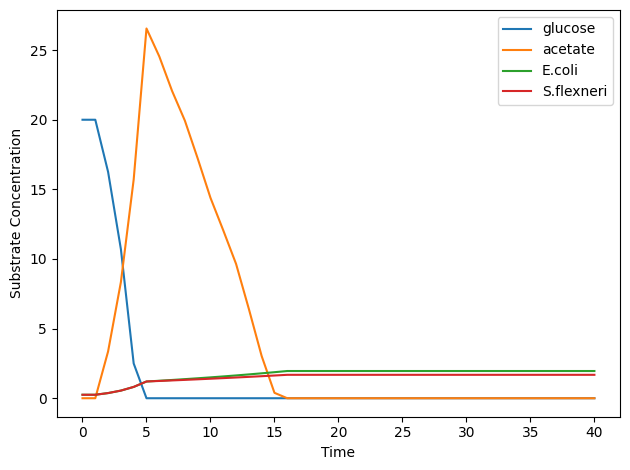

In [3]:
# create a core
core = ProcessTypes()
core = register_types(core)

core.register_process('DFBA', DFBA)
core.register_process('UpdateEnvironment', UpdateEnvironment)

run_environment(core)

In [2]:
from cdFBA.utils import DFBAconfig, model_from_file
import cobra

In [3]:
model = model_from_file('/Users/tasnifrahman/Research/ecolicommunity/agora2/Klebsiella_pneumoniae_subsp_pneumoniae_KPNIH5.xml')

In [9]:
model.exchanges.getattr(name)

AttributeError: DictList has no attribute or entry getattr

In [5]:
config = DFBAconfig(model, medium_type='exchange')

In [6]:
config.kinetics

{'(S)-Propane-1,2-diol': (0.5, 2.0),
 '1,3-Propanediol': (0.5, 2.0),
 '1,5-Diaminopentane': (0.5, 2.0),
 '2-Demethylmenaquinone 8': (0.5, 2.0),
 '2-Hydroxyphenylacetate': (0.5, 2.0),
 '(3,4-dihydroxyphenyl)acetate': (0.5, 2.0),
 '3,4-Dihydroxy-L-phenylalanine': (0.5, 2.0),
 '3-Hydroxyphenylacetate': (0.5, 2.0),
 '4-Aminobutanoate': (0.5, 2.0),
 '4-Hydroxyphenylacetaldehyde': (0.5, 2.0),
 '5-Aminosalicylic Acid (Mesalamine)': (0.5, 2.0),
 '5-Fluorouracil': (0.5, 2.0),
 '7-Aminoclonazepam': (0.5, 2.0),
 'chenodeoxycholate': (0.5, 2.0),
 'L-cysteate': (0.5, 2.0),
 'L-Arabinitol': (0.5, 2.0),
 'Acetate': (0.5, 2.0),
 'N-Acetyl-5-Aminosalicylic Acid': (0.5, 2.0),
 'Acetaldehyde': (0.5, 2.0),
 'N-Acetyl-D-glucosamine': (0.5, 2.0),
 'N-Acetylisoniazid': (0.5, 2.0),
 'R Acetoin': (0.5, 2.0),
 'Adenosine': (0.5, 2.0),
 'Adenosylcobalamin': (0.5, 2.0),
 '2-Oxoglutarate': (0.5, 2.0),
 'D-Alanine': (0.5, 2.0),
 'L-alanine': (0.5, 2.0),
 'L-alanyl-L-aspartate': (0.5, 2.0),
 'L-alanyl-L-glutamine': 